#**Activity 6: Spelling correction**


**Instructions:**

---
* Please download the provided IPython Notebook (ipynb) file and open it in Google Colab. Once opened, enter your code in the same file directly beneath the relevant question's code block.
* Insert a text block below your code to briefly explain it, mentioning any libraries or functions utilized. Answer the questions in brief with examples.

* Submit  
1. The IPython Notebook (ipynb) file.  
2. A PDF version of the notebook (converted from ipynb).

* The similarity score should be less than 15%

##**Spelling correction**
Spelling correction is a fundamental task in Natural Language Processing (NLP) that focuses on identifying and rectifying spelling errors or typos in text. Accurate spelling is crucial for both the readability and comprehensibility of text, as well as for downstream NLP tasks like text classification, information retrieval, and machine translation.

**pyspellchecker**: uses a Levenshtein Distance algorithm to find permutations within an edit distance of 2 from the original word. It then compares all permutations (insertions, deletions, replacements, and transpositions) to known words in a word frequency list. Those words that are found more often in the frequency list are more likely the correct results.

It supports multiple languages including English, Spanish, German, French, Portuguese, Arabic and Basque.

In [1]:
!pip install pyspellchecker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 17.5 MB/s eta 0:00:00


- Import the python library known as pyspellchecker for spelling correction.

In [2]:
##Code block-1

from spellchecker import SpellChecker

def correct_spelling(text):
    spell = SpellChecker()

    # Find all words in the text that are potentially misspelled
    misspelled = spell.unknown(text.split())

    for word in misspelled:
        # Get the most likely word correction
        correction = spell.correction(word)
        if correction:  # Only replace if a correction is found
            text = text.replace(word, correction)

    return text

text = "s far as I am abl to judg, after long attnding to the subject..."
corrected_text = correct_spelling(text)
print(corrected_text)

s far as I am all to judge after long attending to the subject...


- Taken an example text and using the spell checker library we use to correct the spelling.
- Example: 'judg' is corrected as 'judge'.

##**Question - 1**
##Give your own corpus which has minimum  5 sentences that has mispelled words and  then correct  those mispelled sentences

In [3]:
##Your code here

from spellchecker import SpellChecker

def correct_spelling(text):
    spell = SpellChecker()

    # Find all words in the text that are potentially misspelled
    misspelled = spell.unknown(text.split())

    for word in misspelled:
        # Get the most likely word correction
        correction = spell.correction(word)
        if correction:  # Only replace if a correction is found
            text = text.replace(word, correction)

    return text

# Corpus
corpus = [
    "I am studin in Univercity of North Texas",
    "Whatever hapens in my life hapens fo my good.",
    "Death is the ultimte truh of life.",
    "Sun rises in te east.",
    "No extenal factrs can make me sad."
]

# After spelling correction
for sentence in corpus:
    corrected_sentence = correct_spelling(sentence)
    print(corrected_sentence)

I am studio in Univercity of North Texas
Whatever happens in my life happens to my good
Death is the ultimate true of life
Sun rises in the east
No external facts can make me sad


- From the above examples, I can tell that it is not really efficient.
- But if we have a lot of trained data, may be the efficiency can increase.
- Some words the library is correcting properly, whereas few words it has given wrong prediction of the word.

##**Edit Distance Approach**
***
##Most commonly, the edit operations allowed for this purpose are:
*  insert a character into a string.
*  delete a character from a string.
*  replace a character of a string by another character.



In [4]:
!pip install nltk
import regex as re
import string
import numpy as np
from collections import Counter
from nltk.util import ngrams
import itertools

- Import all the libraries required.

In [5]:
data = open('big.txt',encoding='utf-8').read()
print("Number of lines = ",len(data.split('\n')))
data = data.replace('\n',' ').replace('\t',' ').replace('-',' ').replace('—',' ')
data = data.replace('_','')
data = re.sub(r'[^\w\s]','',data)
data = data.lower().strip().split(' ')
data = list(filter(None,data))
print("Number of Tokens = ",len(data))

Number of lines =  128458
Number of Tokens =  1105736


- First, read the data from 'big.txt' file.
- Then preprocess it by replacing the next line, tab space, hyphen, etc with a simple space. (line 3,4).
- Other pre-processing is also applied.
- Then print the number of lines and tokens present in the file.

In [6]:
##code block - 2
# Define a function that calculates the edit distance between two input strings.
def editDistance(str1, str2, m, n):
    # Create a 2D array to store the edit distances for substrings of str1 and str2.
    dp = [[0 for x in range(n+1)] for x in range(m+1)]

    # Initialize the dynamic programming table.
    for i in range(m+1):
        for j in range(n+1):
            # Base cases:
            if i == 0:
                # If str1 is empty, the distance is the length of str2.
                dp[i][j] = j
            elif j == 0:
                # If str2 is empty, the distance is the length of str1.
                dp[i][j] = i
            elif str1[i-1] == str2[j-1]:
                # If the characters at the current positions in str1 and str2 match,
                # no operation is needed, so the distance is the same as the previous state.
                dp[i][j] = dp[i-1][j-1]
            else:
                # If the characters are different, calculate the minimum of three operations:
                # 1. Insertion (dp[i][j-1] + 1)
                # 2. Deletion (dp[i-1][j] + 1)
                # 3. Substitution (dp[i-1][j-1] + 1)
                dp[i][j] = min(dp[i][j-1] + 1, dp[i-1][j] + 1, dp[i-1][j-1] + 1)

    # Return the edit distance between the two input strings.
    return dp[m][n]



- The above method calculates the minimum edit distance.

In [7]:
print('Edit Distance between "frtm" and "from" = ',editDistance('frtm','from',4,4))

Edit Distance between "frtm" and "from" =  1


- Here we have calculated the edit distance from 'frtm' to 'from' and the minimum edit distance is 1.

##**Question - 2**
##Calaculate the Edit Distance between the words "intersects" and "interests"

In [8]:
##Your code here
print('Edit Distance between "intersects" and "interests" = ',editDistance('intersects','interests',len('intersects'),len('interests')))

Edit Distance between "intersects" and "interests" =  2


- The above code gives the minimum edit distance of converting 'intersects' to 'interests'.
- The minimum edit distance to convert it is 2.
- Step 1: Replace 'c' with 's' (cost = 1).
- Step 2: Insert 's' (cost = 1)
- Total cost = 2

##**Peter Norvig Approach**
***
Peter Norvig's spelling method works based off of probability theory like for example the word 'lates' could be corrected to various forms which have late as the prefix.

**argmaxc ∈ candidates P(c) P(w|c)**

The method essentially follows a set of 4 steps in which the word is to be corrected. The first step is the selection mechanism in this particular step the candidate with maximum combined probability is choosen the argamx. In the 2nd step is where the candidate model is implemented using the simple edits such removal,transposition etc. This done to identify the candidates and c to consider. The next step is the implementation of the language model P(c). The probability of the word occuring in the given text data and based on this the probability is calcualted. The final step is the development of the error model is to calculate the P(w|c) is calculated i.e P(iss|is) is high to corrected compared to P(aiss|is).

Note:
* corpus for  the Tutorial is provided in the canvas


In [9]:
##code block -3
import re
from collections import Counter

# Define a function to split text into words and count their occurrences.
def words(text):
    return re.findall(r'\w+', text.lower())

# Read a text file and count the occurrences of each word.
WORDS = Counter(words(open('big.txt').read()))

# Define a function to calculate the probability of a word.
def P(word, N=sum(WORDS.values())):
    "Probability of `word`."
    return WORDS[word] / N

# Define a function to suggest the most probable spelling correction for a word.
def correction(word):
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

# Define a function to generate possible spelling corrections for a word.
def candidates(word):
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or d[wor])

# Define a function to return a set of known words from a list of words.
def known(words):
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

# Define a function to generate all possible edits (one edit away) from a word.
def edits1(word):
    "All edits that are one edit away from `word`."
    letters = 'abcdefghijklmnopqrstuvwxyz'
    splits = [(word[:i], word[i:]) for i in range(len(word) + 1)]
    deletes = [L + R[1:] for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R) > 1]
    replaces = [L + c + R[1:] for L, R in splits if R for c in letters]
    inserts = [L + c + R for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

# Define a function to generate all possible edits (two edits away) from a word.
def edits2(word):
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))


- Import regular expression.
- Import counter which is used to count the frequency of each word.
- The first method words() converts the words into lowercase words.
- Then count the frequency of each word in the 'big.txt' file using counter().
- Method P() calculates the probability of words.
- The correction() method identifies the probable spelling correction of a given word and returns the highest probability.
- The candidate() gives the possible corrections of the error words based on hierarchy.
- The known() returns the words that are in the corpus and which are known.
- The edit1() finds the minimum edit distance based on the words and gives the correct word with a small edit distance, which follows the edit distance of 1.
- And edit2() return the words that follows the edit distance of 2.


In [10]:
correction('speling')


'spelling'

In [11]:
correction('korrectud')

'corrected'

- The above words are tested to correct the spelling and are taken from 'big.txt' file

##Question - 3
##Apply Peter Norvig's spell correction approach to your own text corpus. Suggest five misspelled words and provide the corrected results.

In [12]:
with open("myCorpus.txt", "w") as file:
    sentences = [
        "Once upon a time, there was a crow which was thirsty.",
        "While flying high it saw a pitcher with very little water.",
        "The pitcher was high and has a narrow neck.",
        "The crow tried to drink water from it but was not able to do it.",
        "The crow got an idea.",
        "He picked some small pebbles and dropped them into the pitcher.",
        "The water rose and the crow drank wetter"
    ]
    for sentence in sentences:
        file.write(sentence + "\n")

- The above code creates a 'myCorpus.txt' file stores the sentences one by one.

In [13]:
##Your code here
##code block -3
import re
from collections import Counter

# Define a function to split text into words and count their occurrences.
def words(text):
    return re.findall(r'\w+', text.lower())

# Read a text file and count the occurrences of each word.
WORDS = Counter(words(open('myCorpus.txt').read()))

# Define a function to calculate the probability of a word.
def P(word, N=sum(WORDS.values())):
    "Probability of `word`."
    return WORDS[word] / N

# Define a function to suggest the most probable spelling correction for a word.
def correction(word):
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

# Define a function to generate possible spelling corrections for a word.
def candidates(word):
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or d[wor])

# Define a function to return a set of known words from a list of words.
def known(words):
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

# Define a function to generate all possible edits (one edit away) from a word.
def edits1(word):
    "All edits that are one edit away from `word`."
    letters = 'abcdefghijklmnopqrstuvwxyz'
    splits = [(word[:i], word[i:]) for i in range(len(word) + 1)]
    deletes = [L + R[1:] for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R) > 1]
    replaces = [L + c + R[1:] for L, R in splits if R for c in letters]
    inserts = [L + c + R for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

# Define a function to generate all possible edits (two edits away) from a word.
def edits2(word):
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))


- Import regular expression.
Import counter which is used to count the frequency of each word.
The first method words() converts the words into lowercase words.
Then count the frequency of each word in the 'big.txt' file using counter().
Method P() calculates the probability of words.
The correction() method identifies the probable spelling correction of a given word and returns the highest probability.
The candidate() gives the possible corrections of the error words based on hierarchy.
The known() returns the words that are in the corpus and which are known.
The edit1() finds the minimum edit distance based on the words and gives the correct word with a small edit distance, which follows the edit distance of 1.
And edit2() return the words that follows the edit distance of 2.

In [14]:
correction('cro')

'crow'

In [15]:
correction('pitch')

'pitcher'

In [16]:
correction('pebbl')

'pebbles'

In [17]:
correction('thurst')

'thirsty'

In [18]:
correction('wter')

'water'

In [19]:
correction('litle')

'little'

- As you can see from the above result, it corrected all the misspelled words accurately which where given in the corpus.
- All the words that were in the corpus were correctly predicted because this time we used probability and we trained the data from the corpus.


##**Building a sentence corrector**

##Considering all candidates of all words
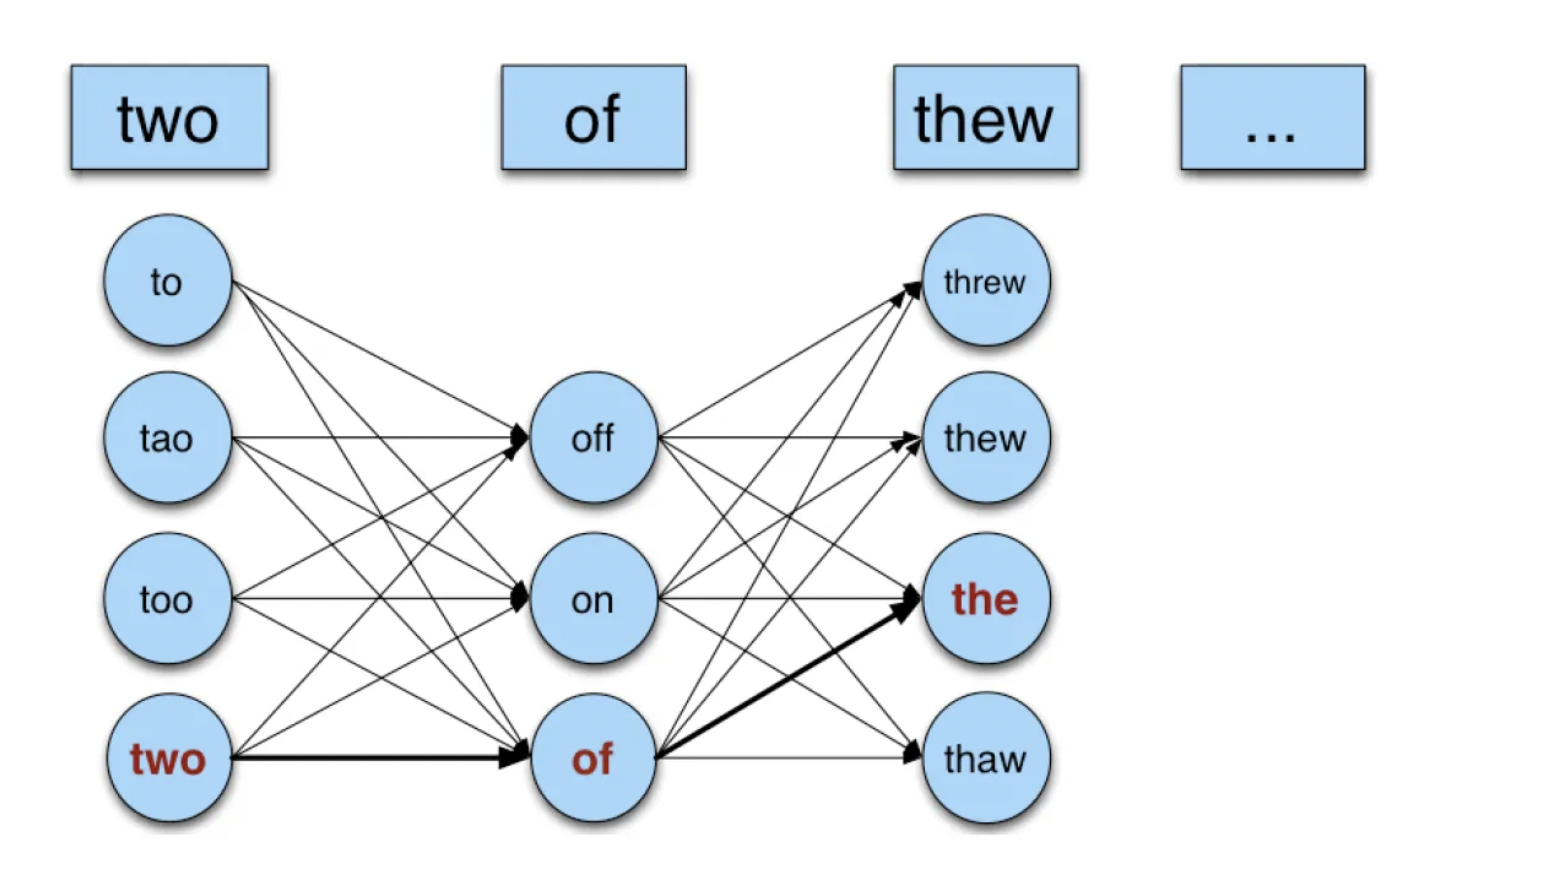


In [20]:
##Code block-4
WORDS = Counter(data)

def P(word, N=sum(WORDS.values())):
    # Returns probability of a word in vocabulary.
    return WORDS[word] / N


def word_candidates(word):
    # Returns the words that are edit distance 0,1 or 2 away from the given word. Inspired from Peter Norvig
    ed_0 = set()
    ed_1 = set()
    ed_2 = set()
    for w in WORDS:
        ed = editDistance(word,w,len(word),len(w))
        if(ed > 2):
            continue
        elif(ed==0):
            ed_0.add(w)
        elif(ed==1):
            ed_1.add(w)
        elif(ed==2):
            ed_2.add(w)
    return [ed_0,ed_1,ed_2,{word}]

def closest_word(word):
    # Chooses closest word according to their frequency. Highest priority given to words with least edit distance.
    for i in word_candidates(word):
        if(i):
            return max(i,key=P)

closest_word('acress')

'across'

- P() finds the probability of the words.
- Then we find the edit distance.
- If the edit distance from the misspelled word to correced word is 0 then it is stored in ed_0 similarly if the edit distance is 1 it is stored in ed_1, and if the edit distance is 2 it is stored in ed_2
- From that it finds the correct word.

In [21]:

##Code block-5
bigrams = Counter(ngrams(data,2))
def bigram_prob(sent):
    out = P(sent[0])
    for i in range(1,len(sent)):
        out *= bigrams[(sent[i-1],sent[i])] / WORDS[sent[i-1]]
    return out

def sent_all_candidates(sent):
    cands = []
    sent = sent.split()
    word_present = [s in WORDS for s in sent]
    if all(word_present):
        for i in sent:
            wc = word_candidates(i)[1]
            wc.add(i)
            cands.append(list(wc))
        cands = list(itertools.product(*cands))
    else:
        idx = word_present.index(0)
        words = word_candidates(sent[idx])[1]
        for i in words:
            l = sent.copy()
            l[idx] = i
            cands.append(l)
    return cands

def closest_all_sent(sent):
    for i in sent_all_candidates(sent):
        if(bigram_prob(i)>0):
            print(i,' Probability = ',bigram_prob(i))
    return ' '.join(max(sent_all_candidates(sent),key=bigram_prob))

closest_all_sent('two of thew')

['two', 'of', 'thee']  Probability =  3.434478468140537e-09
['two', 'of', 'then']  Probability =  8.586196170351343e-10
['two', 'of', 'them']  Probability =  3.176892583029997e-07
['two', 'of', 'the']  Probability =  1.0760221040684302e-05


'two of the'

- The above code corrects the error using bigram probability.
- bigram_prob() finds the probabilities using bigram.
- sent_all_candidates() method finds all the possible candidates for the entire sentence.
- The closest_all_sent() method tries to find the best correction of a sentence by evaluating the candidates.
- As seen in the above output, 'two of the' has the highest probability so it is the most correct sentence.

##Question -4
##In the above tutorial code block 4 it is implemented to the word "acress", now pick any sentence from the Big.txt corpus add some spelling errors for the selected sentence and correct the sentence with your code?

Hint: understand the code from code block 4 and extend it for this task and need not to print the probabilities as shown in code block 5

In [22]:
from collections import Counter

# Load the data from the Big.txt corpus
with open('big.txt', 'r') as f:
    data = f.read().split()

# Precompute word counts
WORDS = Counter(data)

def P(word, N=sum(WORDS.values())):
    # Returns probability of a word in vocabulary.
    return WORDS[word] / N


def word_candidates(word):
    # Returns the words that are edit distance 0,1 or 2 away from the given word. Inspired from Peter Norvig
    ed_0 = set()
    ed_1 = set()
    ed_2 = set()
    for w in WORDS:
        ed = editDistance(word,w,len(word),len(w))
        if(ed > 2):
            continue
        elif(ed==0):
            ed_0.add(w)
        elif(ed==1):
            ed_1.add(w)
        elif(ed==2):
            ed_2.add(w)
    return [ed_0,ed_1,ed_2,{word}]

def closest_word(word):
    # Chooses closest word according to their frequency. Highest priority given to words with least edit distance.
    for i in word_candidates(word):
        if(i):
            return max(i,key=P)

def sentence_correction(sentence):
    words = sentence.split()
    corrected_words = []
    for word in words:
        corrected_words.append(closest_word(word))
    return ' '.join(corrected_words)


error_sentence = "You have an anser to everthing. But how on earh do you dedce that the gas is ot laid on in his hose?"
corrected_sentence = sentence_correction(error_sentence)
print(f"Sentence with error: {error_sentence}")
print(f"Corrected sentence: {corrected_sentence}")

Sentence with error: You have an anser to everthing. But how on earh do you dedce that the gas is ot laid on in his hose?
Corrected sentence: You have an answer to everything. But how on each do you deduce that the gas is of laid on in his hope?


- In the above code, I created a method that divides the sentence into words and calculates the closest word.
- After finding the closest word (correcting the word) it appends to form the corrected sentence.

###**Question 5:**

##Explain briefly the changes you have made in the given Tasks in Today's activity

##Your Explanation Here

- Since spelling correction is the basic task in NLP it is important.
- pyspellchecker is a Python library that uses Levenshtein's distance to calculate the distance between 2 words and find the nearest word.
- Pete Norving's Approach uses the basic principles of probability and a simple language model to correct spelling mistakes.

- Sentence corrector finds the correct words based on the probabilities.

- For Question 1, I have given 5 sentences of my own and tried to correct the misspelled words in my corpus.
- To do that I used spellchecker which is a Python library used to correct the misspelled words.
- The accuracy of the corrected words was not so good.

- For Question 2, I printed the minimum edit distance required to convert 'intersects' to 'interests' which came up as 2, which includes 1 replace and 1 insert operation.

- For Question 3, I created a myCorpus.txt file that contains a few sentences of my own.
- Next, I used the probability method to correct the spelling of misspelled words.
- I gave a few incorrectly spelled words from the corpus to see if the method would give the corrected words.
- Because we trained the data from my corpus it gave all the correct spellings.

- For Question 4, I picked a sentence from the 'Big.txt' and added spelling mistakes to see if the code could correct the sentence.
A sentence is nothing but a collection of words, so I divided the sentence into single words and applied word correction which was shown in code block - 4.


##Additional Resources:
[Spelling correction-Peter Norvig approach](https://towardsdatascience.com/spelling-correction-how-to-make-an-accurate-and-fast-corrector-dc6d0bcbba5f)<br>
[Spelling correction](https://nlp.stanford.edu/IR-book/html/htmledition/spelling-correction-1.html)<br>
[Auto correct](https://www.analyticsvidhya.com/blog/2021/11/autocorrect-feature-using-nlp-in-python/)

